In [75]:
import sympy as sym

In [76]:
t, lag, k ,m2, kr,m4,l2,l3,ev,f1,cd= sym.symbols('t, lag, k ,m_2, k_r,m_4,l_2,l_3,e_v,f_1,c_d')

In [77]:
theta = sym.Function('theta')(t)
sd = sym.Function('s_d')(t)
co = sym.Function('c_o')(theta,sd)

v1 = sym.diff(theta,t)
v2 = sym.diff(sd,t)

zf = (l2*sym.cos(theta)-sd)**2 + (l2*sym.sin(theta)-ev)**2

display(v1,v2,zf)

Derivative(theta(t), t)

Derivative(s_d(t), t)

(-e_v + l_2*sin(theta(t)))**2 + (l_2*cos(theta(t)) - s_d(t))**2

In [78]:
lag  = 0.5*m2*kr**2*v1**2+0.5*m4*v2**2-0.5*k*co**2
lag

-0.5*k*c_o(theta(t), s_d(t))**2 + 0.5*k_r**2*m_2*Derivative(theta(t), t)**2 + 0.5*m_4*Derivative(s_d(t), t)**2

In [79]:
a1 = sym.Array([theta,sd])
b1 = sym.Array([v1,v2])
c1 = sym.Array([sym.diff(v1,t),sym.diff(v2,t)])
d1 = sym.Array([sym.diff(co,a1[0]), sym.diff(co,a1[1])])
e1 = sym.Array([sym.diff(zf,a1[0]),sym.diff(zf,a1[1])])
display(a1,b1,c1,d1,e1)

[theta(t), s_d(t)]

[Derivative(theta(t), t), Derivative(s_d(t), t)]

[Derivative(theta(t), (t, 2)), Derivative(s_d(t), (t, 2))]

[Derivative(c_o(theta(t), s_d(t)), theta(t)), Derivative(c_o(theta(t), s_d(t)), s_d(t))]

[2*l_2*(-e_v + l_2*sin(theta(t)))*cos(theta(t)) - 2*l_2*(l_2*cos(theta(t)) - s_d(t))*sin(theta(t)), -2*l_2*cos(theta(t)) + 2*s_d(t)]

In [80]:
def udef(f,a): return sym.diff(f,a)
def mdel1(f,a): return[udef(f,a[i]) for i in range(len(a))]

In [81]:
eqn = sym.diff(sym.Array(mdel1(lag,b1)),t) - sym.Array(mdel1(lag,a1)) + sym.Array([-f1,cd*b1[1]])
eqn

[-f_1 + 1.0*k*c_o(theta(t), s_d(t))*Derivative(c_o(theta(t), s_d(t)), theta(t)) + 1.0*k_r**2*m_2*Derivative(theta(t), (t, 2)), c_d*Derivative(s_d(t), t) + 1.0*k*c_o(theta(t), s_d(t))*Derivative(c_o(theta(t), s_d(t)), s_d(t)) + 1.0*m_4*Derivative(s_d(t), (t, 2))]

In [82]:
eqarr = sym.Array([sym.Eq(eqn[i],0) for i in range(len(a1))])
eqarr

[Eq(-f_1 + 1.0*k*c_o(theta(t), s_d(t))*Derivative(c_o(theta(t), s_d(t)), theta(t)) + 1.0*k_r**2*m_2*Derivative(theta(t), (t, 2)), 0), Eq(c_d*Derivative(s_d(t), t) + 1.0*k*c_o(theta(t), s_d(t))*Derivative(c_o(theta(t), s_d(t)), s_d(t)) + 1.0*m_4*Derivative(s_d(t), (t, 2)), 0)]

In [83]:
d2w = sym.Array(sym.linsolve(eqarr,c1))[0]
d2w1 = d2w.subs([(d1[0],e1[0]/(2*l3)), (d1[1],e1[1]/(2*l3))])
d2w1

[1.0*f_1/(k_r**2*m_2) - 0.5*k*(2*l_2*(-e_v + l_2*sin(theta(t)))*cos(theta(t)) - 2*l_2*(l_2*cos(theta(t)) - s_d(t))*sin(theta(t)))*c_o(theta(t), s_d(t))/(k_r**2*l_3*m_2), -1.0*c_d*Derivative(s_d(t), t)/m_4 - 0.5*k*(-2*l_2*cos(theta(t)) + 2*s_d(t))*c_o(theta(t), s_d(t))/(l_3*m_4)]

In [84]:
ceq = sym.diff(zf,theta)*c1[0] + sym.diff(zf,sd)*c1[1] + sym.diff(zf,[theta,2])*b1[0]**2+2*sym.diff(sym.diff(zf,theta),sd)*b1[0]*b1[1]+ sym.diff(zf,[sd,2])*b1[1]**2
ceq1 = ceq.subs([(c1[0],d2w1[0]), (c1[1],d2w1[1])])
ceq1

2*l_2*(l_2*sin(theta(t))**2 + l_2*cos(theta(t))**2 + (e_v - l_2*sin(theta(t)))*sin(theta(t)) - (l_2*cos(theta(t)) - s_d(t))*cos(theta(t)))*Derivative(theta(t), t)**2 + 4*l_2*sin(theta(t))*Derivative(s_d(t), t)*Derivative(theta(t), t) + (-2*l_2*cos(theta(t)) + 2*s_d(t))*(-1.0*c_d*Derivative(s_d(t), t)/m_4 - 0.5*k*(-2*l_2*cos(theta(t)) + 2*s_d(t))*c_o(theta(t), s_d(t))/(l_3*m_4)) + (1.0*f_1/(k_r**2*m_2) - 0.5*k*(2*l_2*(-e_v + l_2*sin(theta(t)))*cos(theta(t)) - 2*l_2*(l_2*cos(theta(t)) - s_d(t))*sin(theta(t)))*c_o(theta(t), s_d(t))/(k_r**2*l_3*m_2))*(2*l_2*(-e_v + l_2*sin(theta(t)))*cos(theta(t)) - 2*l_2*(l_2*cos(theta(t)) - s_d(t))*sin(theta(t))) + 2*Derivative(s_d(t), t)**2

In [85]:
kv = sym.solve(ceq1,k)[0]

In [86]:
kv

l_3*(c_d*k_r**2*l_2*m_2*cos(theta(t))*Derivative(s_d(t), t) - c_d*k_r**2*m_2*s_d(t)*Derivative(s_d(t), t) - e_v*f_1*l_2*m_4*cos(theta(t)) + e_v*k_r**2*l_2*m_2*m_4*sin(theta(t))*Derivative(theta(t), t)**2 + f_1*l_2*m_4*s_d(t)*sin(theta(t)) + k_r**2*l_2*m_2*m_4*s_d(t)*cos(theta(t))*Derivative(theta(t), t)**2 + 2.0*k_r**2*l_2*m_2*m_4*sin(theta(t))*Derivative(s_d(t), t)*Derivative(theta(t), t) + k_r**2*m_2*m_4*Derivative(s_d(t), t)**2)/((k_r**2*m_2*(l_2*cos(theta(t)) - s_d(t))**2 + l_2**2*m_4*(e_v*cos(theta(t)) - s_d(t)*sin(theta(t)))**2)*c_o(theta(t), s_d(t)))

In [87]:
d2w2 = d2w1.subs(k,kv)
d2w2

[1.0*f_1/(k_r**2*m_2) - 0.5*(2*l_2*(-e_v + l_2*sin(theta(t)))*cos(theta(t)) - 2*l_2*(l_2*cos(theta(t)) - s_d(t))*sin(theta(t)))*(c_d*k_r**2*l_2*m_2*cos(theta(t))*Derivative(s_d(t), t) - c_d*k_r**2*m_2*s_d(t)*Derivative(s_d(t), t) - e_v*f_1*l_2*m_4*cos(theta(t)) + e_v*k_r**2*l_2*m_2*m_4*sin(theta(t))*Derivative(theta(t), t)**2 + f_1*l_2*m_4*s_d(t)*sin(theta(t)) + k_r**2*l_2*m_2*m_4*s_d(t)*cos(theta(t))*Derivative(theta(t), t)**2 + 2.0*k_r**2*l_2*m_2*m_4*sin(theta(t))*Derivative(s_d(t), t)*Derivative(theta(t), t) + k_r**2*m_2*m_4*Derivative(s_d(t), t)**2)/(k_r**2*m_2*(k_r**2*m_2*(l_2*cos(theta(t)) - s_d(t))**2 + l_2**2*m_4*(e_v*cos(theta(t)) - s_d(t)*sin(theta(t)))**2)), -1.0*c_d*Derivative(s_d(t), t)/m_4 - 0.5*(-2*l_2*cos(theta(t)) + 2*s_d(t))*(c_d*k_r**2*l_2*m_2*cos(theta(t))*Derivative(s_d(t), t) - c_d*k_r**2*m_2*s_d(t)*Derivative(s_d(t), t) - e_v*f_1*l_2*m_4*cos(theta(t)) + e_v*k_r**2*l_2*m_2*m_4*sin(theta(t))*Derivative(theta(t), t)**2 + f_1*l_2*m_4*s_d(t)*sin(theta(t)) + k_r**2*l_2

In [88]:
zarr = sym.Array([sym.Function('z1')(t),sym.Function('z2')(t),sym.Function('z3')(t),sym.Function('z4')(t)])
d1zarr = sym.diff(zarr,t)
display(zarr,d1zarr)

[z1(t), z2(t), z3(t), z4(t)]

[Derivative(z1(t), t), Derivative(z2(t), t), Derivative(z3(t), t), Derivative(z4(t), t)]

In [90]:
nd2w = d2w2.subs([(b1[0],zarr[2]),(b1[1],zarr[3]), (a1[0],zarr[0]), (a1[1],zarr[1])])
nd2w


[1.0*f_1/(k_r**2*m_2) - 0.5*(2*l_2*(-e_v + l_2*sin(z1(t)))*cos(z1(t)) - 2*l_2*(l_2*cos(z1(t)) - z2(t))*sin(z1(t)))*(c_d*k_r**2*l_2*m_2*z4(t)*cos(z1(t)) - c_d*k_r**2*m_2*z2(t)*z4(t) - e_v*f_1*l_2*m_4*cos(z1(t)) + e_v*k_r**2*l_2*m_2*m_4*z3(t)**2*sin(z1(t)) + f_1*l_2*m_4*z2(t)*sin(z1(t)) + k_r**2*l_2*m_2*m_4*z2(t)*z3(t)**2*cos(z1(t)) + 2.0*k_r**2*l_2*m_2*m_4*z3(t)*z4(t)*sin(z1(t)) + k_r**2*m_2*m_4*z4(t)**2)/(k_r**2*m_2*(k_r**2*m_2*(l_2*cos(z1(t)) - z2(t))**2 + l_2**2*m_4*(e_v*cos(z1(t)) - z2(t)*sin(z1(t)))**2)), -1.0*c_d*z4(t)/m_4 - 0.5*(-2*l_2*cos(z1(t)) + 2*z2(t))*(c_d*k_r**2*l_2*m_2*z4(t)*cos(z1(t)) - c_d*k_r**2*m_2*z2(t)*z4(t) - e_v*f_1*l_2*m_4*cos(z1(t)) + e_v*k_r**2*l_2*m_2*m_4*z3(t)**2*sin(z1(t)) + f_1*l_2*m_4*z2(t)*sin(z1(t)) + k_r**2*l_2*m_2*m_4*z2(t)*z3(t)**2*cos(z1(t)) + 2.0*k_r**2*l_2*m_2*m_4*z3(t)*z4(t)*sin(z1(t)) + k_r**2*m_2*m_4*z4(t)**2)/(m_4*(k_r**2*m_2*(l_2*cos(z1(t)) - z2(t))**2 + l_2**2*m_4*(e_v*cos(z1(t)) - z2(t)*sin(z1(t)))**2))]

In [91]:
rhs = sym.Array([zarr[2],zarr[3],nd2w[0],nd2w[1]])
rhs

[z3(t), z4(t), 1.0*f_1/(k_r**2*m_2) - 0.5*(2*l_2*(-e_v + l_2*sin(z1(t)))*cos(z1(t)) - 2*l_2*(l_2*cos(z1(t)) - z2(t))*sin(z1(t)))*(c_d*k_r**2*l_2*m_2*z4(t)*cos(z1(t)) - c_d*k_r**2*m_2*z2(t)*z4(t) - e_v*f_1*l_2*m_4*cos(z1(t)) + e_v*k_r**2*l_2*m_2*m_4*z3(t)**2*sin(z1(t)) + f_1*l_2*m_4*z2(t)*sin(z1(t)) + k_r**2*l_2*m_2*m_4*z2(t)*z3(t)**2*cos(z1(t)) + 2.0*k_r**2*l_2*m_2*m_4*z3(t)*z4(t)*sin(z1(t)) + k_r**2*m_2*m_4*z4(t)**2)/(k_r**2*m_2*(k_r**2*m_2*(l_2*cos(z1(t)) - z2(t))**2 + l_2**2*m_4*(e_v*cos(z1(t)) - z2(t)*sin(z1(t)))**2)), -1.0*c_d*z4(t)/m_4 - 0.5*(-2*l_2*cos(z1(t)) + 2*z2(t))*(c_d*k_r**2*l_2*m_2*z4(t)*cos(z1(t)) - c_d*k_r**2*m_2*z2(t)*z4(t) - e_v*f_1*l_2*m_4*cos(z1(t)) + e_v*k_r**2*l_2*m_2*m_4*z3(t)**2*sin(z1(t)) + f_1*l_2*m_4*z2(t)*sin(z1(t)) + k_r**2*l_2*m_2*m_4*z2(t)*z3(t)**2*cos(z1(t)) + 2.0*k_r**2*l_2*m_2*m_4*z3(t)*z4(t)*sin(z1(t)) + k_r**2*m_2*m_4*z4(t)**2)/(m_4*(k_r**2*m_2*(l_2*cos(z1(t)) - z2(t))**2 + l_2**2*m_4*(e_v*cos(z1(t)) - z2(t)*sin(z1(t)))**2))]

In [92]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [93]:
varr = [(ev,0),(m2,1.4),(m4,1),(l2,0.2),(l3,0.4),(kr,0.02),(f1,0.2),(cd,5)]

def dydt(zz,tval):
    temp = rhs.subs(varr)
    return temp.subs([(zarr[0],zz[0]),(zarr[1],zz[1]),(zarr[2],zz[2]),(zarr[3],zz[3]),(t,tval)])


In [94]:
nstp = 800
tout = np.linspace(0,8,nstp)
yinit = [np.pi/2,(sym.sqrt(l3**2-(l2-ev)**2)).subs(varr),0,0]
yinit

[1.5707963267948966, 0.346410161513776, 0, 0]

In [95]:
sol = odeint(dydt,yinit,tout)

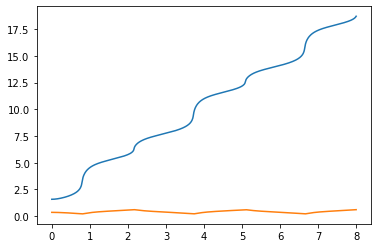

In [98]:
plt.plot(tout,sol[:,0], tout,sol[:,1])

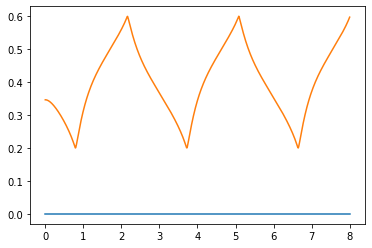

In [99]:
plt.plot(tout,0*sol[:,0], tout,sol[:,1])

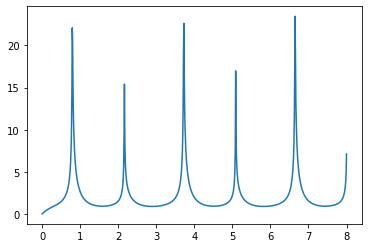

In [103]:
plt.plot(tout,sol[:,2])

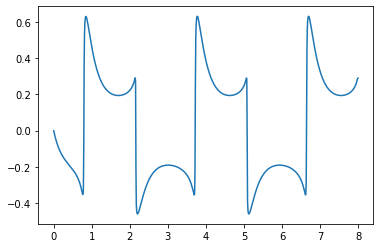

In [104]:
plt.plot(tout,sol[:,3])

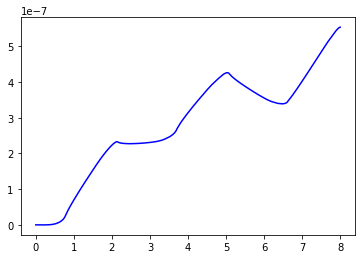

In [108]:
zfa = (zf.subs(varr)).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
subarr = [[(zarr[j], sol[i,j]) for j in range(4)] for i in range(nstp)]
coarr = [(sym.sqrt(zfa).subs(subarr[i])-l3.subs(varr)) for i in range(nstp)]
plt.plot(tout, coarr, 'b')

In [109]:
intf = ((kv*co).subs(varr)).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
intfarr = [(intf.subs(subarr[i])) for i in range(nstp)]

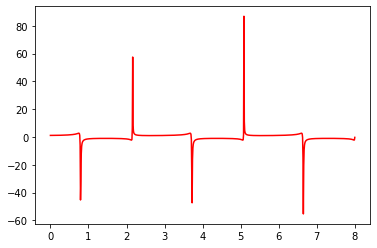

In [110]:
plt.plot(tout,intfarr, 'r')

In [113]:
angarr = [((rhs[2].subs(varr)).subs(subarr[i])) for i in range(nstp)]
slidearr =[((rhs[3].subs(varr)).subs(subarr[i])) for i in range(nstp)]

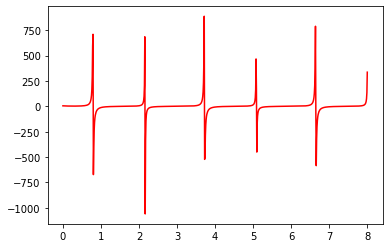

In [114]:
plt.plot(tout,angarr,'r')


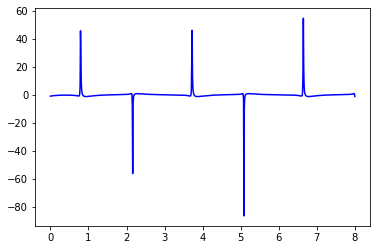

In [115]:
plt.plot(tout,slidearr,'b')

In [116]:
zarr2 = sym.Array([sym.Function('z5')(t),sym.Function('z6')(t),sym.Function('z7')(t),sym.Function('z8')(t)])

In [117]:
rhsv = np.array([(rhs.subs(varr)).subs(subarr[i]) for i in range(nstp)])

In [118]:
fullarr = [[(zarr[j], sol[i,j]) for j in range(4)] + [(zarr2[j], rhsv[i,j]) for j in range(4)] for i in range(nstp)]

In [119]:
fullarr

[[(z1(t), 1.5707963267948966),
  (z2(t), 0.3464101615137755),
  (z3(t), 0.0),
  (z4(t), 0.0),
  (z5(t), 0.0),
  (z6(t), 0.0),
  (z7(t), 4.93096646942803),
  (z8(t), -0.986193293885602)],
 [(z1(t), 1.5710394991198482),
  (z2(t), 0.34636153048647966),
  (z3(t), 0.048181345668205616),
  (z4(t), -0.009634916855052545),
  (z5(t), 0.0481813456682056),
  (z6(t), -0.00963491685505254),
  (z7(t), 4.69607531182007),
  (z8(t), -0.938815003029001)],
 [(z1(t), 1.571753588449139),
  (z2(t), 0.34621876210629127),
  (z3(t), 0.09409327861254269),
  (z4(t), -0.01880824694629713),
  (z5(t), 0.0940932786125427),
  (z6(t), -0.0188082469462971),
  (z7(t), 4.47743886552103),
  (z8(t), -0.893968437225260)],
 [(z1(t), 1.572916669409869),
  (z2(t), 0.3459863528527629),
  (z3(t), 0.13789249414173926),
  (z4(t), -0.02754467618244635),
  (z5(t), 0.137892494141739),
  (z6(t), -0.0275446761824464),
  (z7(t), 4.27387473444074),
  (z8(t), -0.851523005062766)],
 [(z1(t), 1.574508324923083),
  (z2(t), 0.3456685590474571

In [121]:
rho2,Ox,Oy, N = sym.symbols('rho_2, O_x,O_y,N')
pG2 = rho2*sym.Array([sym.cos(theta), sym.sin(theta)])
ps = sym.Array([sd,ev])
ps

[s_d(t), e_v]

In [122]:
apG2 = sym.diff(pG2,[t,2])
aps = sym.diff(ps,[t,2])
aps

[Derivative(s_d(t), (t, 2)), 0]

In [125]:
teqm = (m2*apG2+m4*aps-sym.Array([Ox-cd*b1[1],Oy+N])).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
teqm

[-O_x + c_d*z4(t) - m_2*rho_2*(z3(t)**2*cos(z1(t)) + sin(z1(t))*Derivative(z3(t), t)) + m_4*Derivative(z4(t), t), -N - O_y + m_2*rho_2*(-z3(t)**2*sin(z1(t)) + cos(z1(t))*Derivative(z3(t), t))]

In [129]:
ps3d = sym.Array(np.append(ps,sym.Array([0])))
ps3d
d1ps3d = sym.diff(ps3d,t)

Ho = (m2*kr**2*b1[0]+np.cross(ps3d,m4*d1ps3d)[2]).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
reqm = (sym.diff(Ho,t)-f1-sd*N-ev*(cd*b1[1])).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
reqm

-N*z2(t) - c_d*e_v*z4(t) - e_v*m_4*Derivative(z4(t), t) - f_1 + k_r**2*m_2*Derivative(z3(t), t)

In [130]:
display(d1ps3d)

[Derivative(s_d(t), t), 0, 0]

In [131]:
display(Ho)

-e_v*m_4*z4(t) + k_r**2*m_2*z3(t)

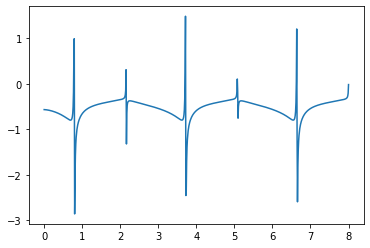

In [142]:
Ny = sym.solve(reqm,N)[0]
Ny = Ny.subs([(sym.diff(zarr[2],t),zarr2[2]),(sym.diff(zarr[3],t),zarr2[3])]).subs(varr)
# [(zarr[j], sol[i,j]) for j in range(4)]
Nyarr = [(Ny.subs(fullarr[i])) for i in range(nstp)]
plt.plot(tout,Nyarr)


In [143]:
teqm[0]

-O_x + c_d*z4(t) - m_2*rho_2*(z3(t)**2*cos(z1(t)) + sin(z1(t))*Derivative(z3(t), t)) + m_4*Derivative(z4(t), t)

(-10.0, 10.0)

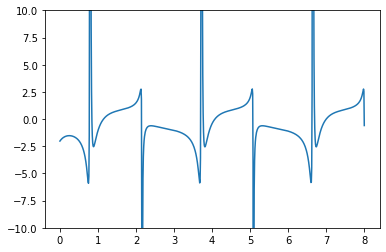

In [152]:
Rx = sym.solve(teqm[0],Ox)[0]
Rx = Rx.subs([(sym.diff(zarr[2],t),zarr2[2]),(sym.diff(zarr[3],t),zarr2[3])]).subs(varr).subs([(rho2,0.15)])
Rxarr = [(Rx.subs(fullarr[i])) for i in range(nstp)]
plt.plot(tout,Rxarr)
plt.ylim(-10,10)

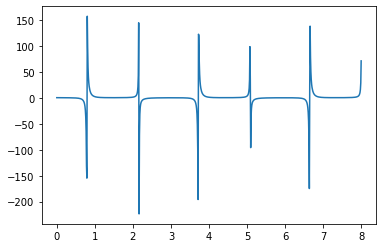

In [160]:
Ry = sym.solve(teqm[1],Oy)[0]
Ry = Ry.subs([(sym.diff(zarr[2],t),zarr2[2]),(sym.diff(zarr[3],t),zarr2[3])]).subs(varr).subs([(rho2,0.15)])
Ryarr = [(Ry.subs(fullarr[i]).subs(N,Nyarr[i])) for i in range(nstp)]
plt.plot(tout,Ryarr)